In [1]:
# Задание 1
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
# Создайте датафреймы X и y из этих данных.

# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки 
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

# Масштабируйте данные с помощью StandardScaler.

# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.

# Постройте диаграмму рассеяния на этих данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [7]:
# X_train.head()

In [8]:
# X_train_scaled.head()

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

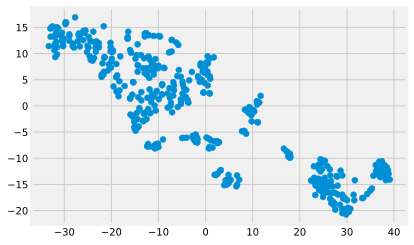

In [10]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

In [11]:
# Задание 2
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.

# Вычислите средние значения price и CRIM в разных кластерах.

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [13]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    191
1    128
2     85
dtype: int64

In [14]:
labels_test = kmeans.predict(X_test_scaled)

Text(25,-10,'Кластер 2')

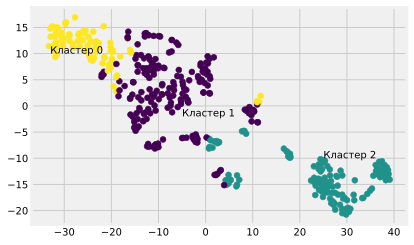

In [15]:
# График t-SNE с известными лейблами
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.text(-33, 10, 'Кластер 0')
plt.text(-5, -2, 'Кластер 1')
plt.text(25, -10, 'Кластер 2')

Text(0.5,0,'Цена: диаграмма рассеяния на данных TSNE')

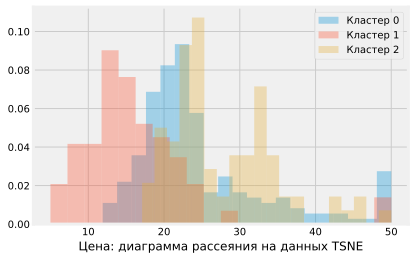

In [16]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.33)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.33)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.33)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена: диаграмма рассеяния на данных TSNE')

Text(0.5,0,'CRIM (per capita crime rate by town)')

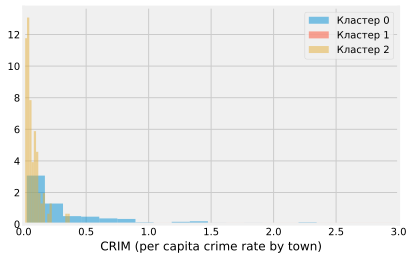

In [17]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 3)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM (per capita crime rate by town)')

In [18]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.42098554973821983

In [19]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.637094062500003

In [20]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.0721184705882353

In [21]:
y_train[labels_train==0].mean()

24.971204188481675

In [22]:
y_train[labels_train==1].mean()

16.1796875

In [23]:
y_train[labels_train==2].mean()

27.87411764705882

In [24]:
# * Задание 3
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.

# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score

In [26]:
# 1я модель - на объектах из Кластера 0
lr.fit(X_train_scaled.loc[labels_train==0, :], 
       y_train[labels_train==0])
y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])
r2_score(y_test[labels_test==0], y_test_pred_0)

0.7270040274288263

In [27]:
# 2я модель - на объектах из Кластера 1
lr.fit(X_train_scaled.loc[labels_train==1, :], 
       y_train[labels_train==1])
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])
r2_score(y_test[labels_test==1], y_test_pred_1)

0.5224594819404749

In [28]:
# 3я модель - на объектах из Кластера 2
lr.fit(X_train_scaled.loc[labels_train==2, :], 
       y_train[labels_train==2])
y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test==2, :])
r2_score(y_test[labels_test==2], y_test_pred_2)

0.9166266931889548

In [29]:
# Объединение известных правильных ответов по объектам из двух кластеров
y_test_all = np.hstack([y_test[labels_test==0], 
                        y_test[labels_test==1],
                        y_test[labels_test==2]])

In [30]:
# Объединение предсказанных ответов по объектам из двух кластеров
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1, y_test_pred_2])

In [31]:
r2_score(y_test_all, y_test_pred_all)

0.7965027511902699